# MTH9879 Homework 7

Assigned: March 29, 2017.
Due: April 25, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr, highfrequency
* Notes:
    * The running time of this notebook is around 8s
    * Trade signs computed by using sign() in highfrequency package

In [1]:
# Load libraries
library(repr)   # Change feature of plot

In [2]:
# Record the total running time of this notebook
# Starting record the time
ptm<-proc.time()

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

### Answer of Q1

* From $X_T=\sum_{i=1}^T\,\epsilon_i$, we have:
$$
\begin{eqnarray*}
X_{t+\tau}-X_t & = & \sum_{i=1}^{t+\tau}\epsilon_i - \sum_{i=1}^{t}\epsilon_i \\
& = & \sum_{i=t+1}^{t+\tau}\epsilon_i
\end{eqnarray*}
$$

* Thus:
$$
\begin{eqnarray*}
\text{Var}[X_{t+\tau}-X_t] &=& \text{Var}[\sum_{i=t+1}^{t+\tau}\epsilon_i] \\
&=& \sum_{i=t+1}^{t+\tau}\text{Var}[\epsilon_i] + 2\sum_{1 \le i<j \le \tau} \text{Cov}[\epsilon_i,\epsilon_j] \\
&=& \tau+2\sum_{1 \le i<j \le \tau}\left(\mathbb{E}\left(\epsilon_i\epsilon_j\right)-\mathbb{E}\left(\epsilon_i\right)\mathbb{E}\left(\epsilon_j\right)\right) \\
&=& \tau+2\sum_{1 \le i<j \le \tau}\left(\mathbb{E}\left(\epsilon_i\epsilon_j\right) \right) \\
&\sim& \tau+ 2\sum_{i=1}^{\tau-1}\sum_{k=1}^{\tau-i}k^{-\alpha}\,\text{ Let } k =j-i\\
&\approx& \tau + 2\sum_{i=1}^{\tau-1}\frac{k^{1-\alpha}}{1-\alpha}\bigg|_1^{\tau-i} (*)\\
&=& \tau + 2\sum_{i=1}^{\tau-1}\left(\frac{(\tau-i)^{1-\alpha}}{1-\alpha}-\frac{1}{1-\alpha}\right) \\
&\approx& \tau + 2 \left(\frac{(\tau-i)^{2-\alpha}}{2-\alpha}\bigg|_{1}^{\tau-1} - \frac{\tau-1}{1-\alpha}\right) (**)\\
&=& \tau + 2\left(\frac{1-(\tau-1)^{2-\alpha}}{2-\alpha}-\frac{\tau-1}{1-\alpha}\right)\\
&=& \tau + \frac{2}{\alpha-2}(\tau-1)^{2-\alpha}+ \text{const.}\\
&\sim& \tau^{2-\alpha}\\
&=& \tau^{2H}
\end{eqnarray*}
$$
with 
$$
H=1-\frac{\alpha}{2}\\
\mathbb{E}(\epsilon_i)=0\\
\sigma_{\epsilon_i}=1\\
\tau \rightarrow \infty
$$
The sum of powers formula used in $\text{(*) and (**)}$:
$$
\sum_{a\le k<b}k^m = \frac{k^{m+1}}{m+1}\bigg|_a^b
$$
with $a \le b$, and $m \neq -1$
    
    Reference:http://homepages.gac.edu/~holte/courses/mcs256/documents/summation/top10sums.pdf

## MSFT data from Alejandro Ca&ntilde;ete

In [3]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



### 2. (10 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


### Answer of Q2

#### Answer of (a): Generate trade signs from the *msft130311.inet* data frame

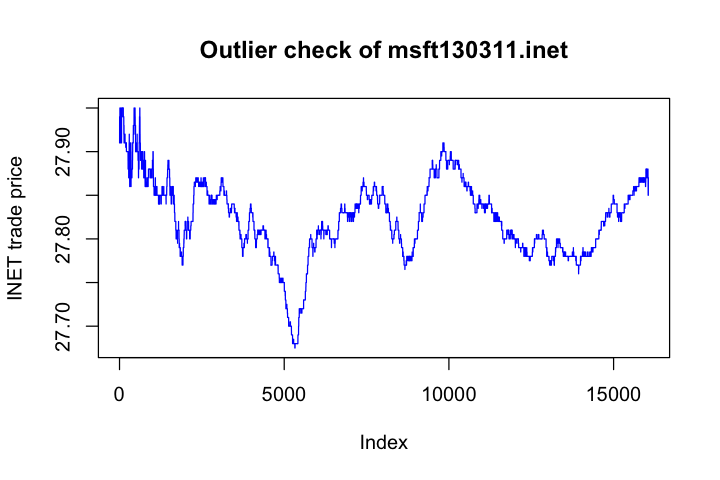

In [4]:
# Check the data from price: outliers
options(repr.plot.height=4, repr.plot.width=6)
plot(msft130311.inet$trade.price,type = 'l', col='blue',
    ylab='INET trade price',main='Outlier check of msft130311.inet')

Figure 1. Outelier check of *msft130311.inet* data: No outliers

In [5]:
# Compute the trade signs to generate series tradeSign by using signed.shares data
tradeSign<- sign(msft130311.inet$signed.shares)

#### Answer of (b): Fit an AR(1) model to the tradeSign data
* Reference: https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ar.html

In [6]:
# Fit AR(1) model to tradeSign
# No need to compute the AIC to selet order, assign order=1
# demean=FALSE: the mean is not estimated during the fitting
TSar1<- ar(tradeSign,aic=FALSE,order.max=1,demean=FALSE)
TSar1


Call:
ar(x = tradeSign, aic = FALSE, order.max = 1, demean = FALSE)

Coefficients:
     1  
0.8223  

Order selected 1  sigma^2 estimated as  0.3238

#### Answer of (c): How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast

* **$\phi_1$ & autocorrelation coefficient of *tradeSign***

In [7]:
# Get phi_1
phi1<- TSar1$ar
# Compute the autocorrelation coefficients of tradeSign
# demean=FALSE, must be consistent with previous ar model
acts.inet <- acf(tradeSign,plot=FALSE,demean=FALSE)
# AC computation: avoid 1st element, 0th order
lag.inet <- acts.inet$lag[-1]
acf.inet <- acts.inet$acf[-1]
acts.inet
paste('$\\phi_1$',' is equal to 1st order autocorrelation coefficient of tradeSign?: ',
     identical(phi1,acf.inet[1]))


Autocorrelations of series ‘tradeSign’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.822 0.714 0.645 0.594 0.556 0.522 0.495 0.478 0.459 0.438 0.423 0.407 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.400 0.391 0.379 0.368 0.357 0.345 0.335 0.328 0.315 0.305 0.298 0.290 0.284 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.280 0.275 0.270 0.262 0.255 0.251 0.246 0.236 0.222 0.213 0.207 0.206 0.205 
   39    40    41    42 
0.199 0.195 0.186 0.181 

[1] "$\\phi_1$  is equal to 1st order autocorrelation coefficient of tradeSign?:  TRUE"

* $\phi_1$ **equals to the 1st order (lag=1) autocorrelation coefficient of *tradeSign***

* **Mean-squared error of this AR(1) forecast**

In [8]:
cat("The mean-squared error of this AR(1) model is: ",
   TSar1$var.pred)

The mean-squared error of this AR(1) model is:  0.3238112

#### Answer of (d): Fit AR(p) of *tradeSign*

In [9]:
# Fit AR(p) by using AIC criterion
# demean=FALSE: consistent with AR(1)
TSarp<- ar(tradeSign, aic = TRUE,demean=FALSE)
TSarp


Call:
ar(x = tradeSign, aic = TRUE, demean = FALSE)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6958   0.0372   0.0417   0.0183   0.0234   0.0044  -0.0005   0.0298  
      9       10       11       12       13       14       15       16  
 0.0107  -0.0083   0.0145  -0.0140   0.0225   0.0121  -0.0005   0.0057  
     17       18       19       20  
 0.0047  -0.0043   0.0003   0.0165  

Order selected 20  sigma^2 estimated as  0.3116

#### Answer of (e): What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?

In [10]:
cat("The value of p selected by R is: ", TSarp$order,"\n")
cat("The mean-squared error of this AR(p) is: ", TSarp$var.pred)

The value of p selected by R is:  20 
The mean-squared error of this AR(p) is:  0.3115532

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

### Answer of Q3

#### Answer of (a): Forecast AR(p) and plot the histogram plot with bin from -1.01 to 1.01 and steps of 0.02

* Forecast AR(p) based on the formula:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

In [11]:
# Get the value of p
p<- TSarp$order
# Get the series of phi
phik<- TSarp$ar

# Create base trade sign based on value of p
TSfore<- rep(0, length(tradeSign))

for (t in 1: p){
    TSfore[t]<- tradeSign[t]
}
    
# Forecaset starts from t=p+1
for (t in (p+1): length(tradeSign)){
    for (k in 1:p){
        TSfore[t]<- TSfore[t]+tradeSign[t-k]*phik[k]        
    }
}
            

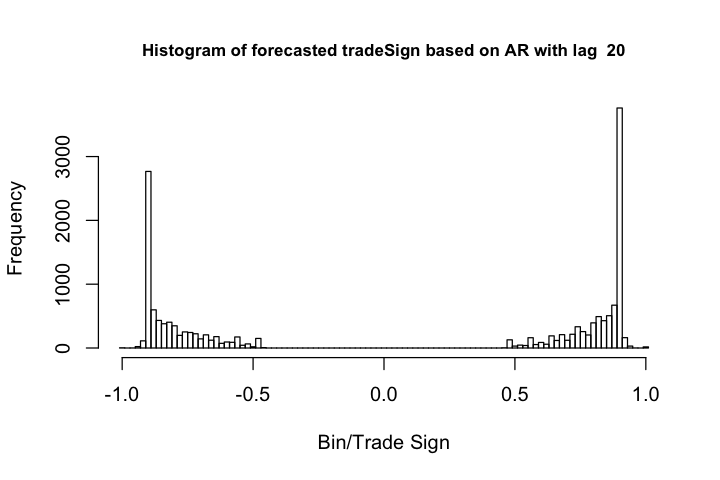

In [12]:
options(repr.plot.height=4, repr.plot.width=6)
# Plot the histogram
hist(TSfore, breaks = seq(-1.01,1.01,by=0.02),xlab='Bin/Trade Sign',
     main=paste('Histogram of forecasted tradeSign based on AR with lag ',p),
    cex.main=0.85)

Figure 2. Histogram of forecasted tradeSign based on AR(p)

#### Answer of (b): Plot the average actual order sign in each bin against the average forecast order sign. What is the slope of the resulting graph?

**Compute the average forecasted order sign and average actual order sign**

* The actual forecasted order sign started from $p+1$, since the order signs of forecast and actual are the same from 1 to $p$.

* Therefore, I chose to **compare/compute the average order signs of forecast and actual from $p+1$**

In [13]:
# Compute the average forecasted order sign
# Compute the number of bins
bin_start<- -1.01
bin_end<- 1.01
bin_step<- 0.02
bin_nums<- (bin_end-bin_start)/bin_step

# Initial vectors with 0s
actual<- rep(0, bin_nums)
forecast<- rep(0, bin_nums)
avg_forecast<- rep(0, bin_nums)
avg_actual<- rep(0, bin_nums)

# Compute the average order signs at each bins
for (i in 1:bin_nums){
    count<- 0
    # Since the tradeSign is -1 or 1, using forecasted value as criterion
    # Compute average order signs of forecast and actual from p+1
    for (j in (p+1): length(TSfore)){
        # Locate the corresponding bins
        if(((bin_start+bin_step*(i-1))< TSfore[j]) & (TSfore[j] <= (bin_start+bin_step*i))){
            count<- count+1
            actual[i]<- actual[i]+tradeSign[j]
            forecast[i]<- forecast[i]+TSfore[j]                    
        }
    }
    # Compute the average of each bins
    avg_actual[i]<- actual[i]/count
    avg_forecast[i]<- forecast[i]/count
    
}        

**Compute the slope**

In [14]:
# Regress the average actual order sign on average forecasted order sign
# With constant term of this regression
res<- lm(avg_actual~avg_forecast)
res
slope<- res$coefficients[2]


Call:
lm(formula = avg_actual ~ avg_forecast)

Coefficients:
 (Intercept)  avg_forecast  
      0.0162        0.9863  


**Plot the average order signs**

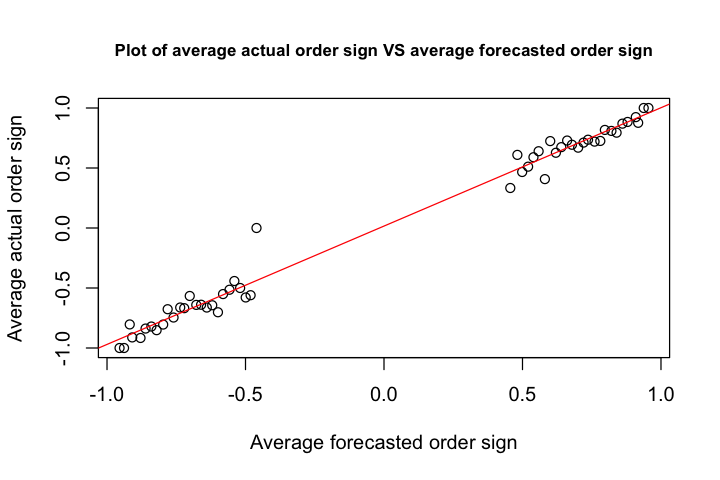

In [15]:
# Plot with regression line
options(repr.plot.height=4, repr.plot.width=6)
plot(avg_forecast,avg_actual,main='Plot of average actual order sign VS average forecasted order sign',
    xlab='Average forecasted order sign', ylab='Average actual order sign',cex.main=0.85)
# Add the regression line
abline(res,col='red')


Figure 3. Plot of average actual order sign VS average forecasted order sign with regression line (red solid line)

**Slope of the graph** 

In [16]:
cat("The slope of the graph (Figure 3) is: ",slope)

The slope of the graph (Figure 3) is:  0.9863347

#### Answer of (c): what is the probability  *p*  that the next trade will be a market buy

* Denote $p$ as the probability that the next trade will be a market buy, $1-p$ will be the a market sell of next trade.


* Denote the slope of the regression in the graph (Figure 3) is $k$. Then the actual order sign is $k\hat{\epsilon}$ given expected (forecasted) order sign is $\hat{\epsilon}$


* Thus, we have:
$$
k\hat{\epsilon}=1\times p + (-1) \times (1-p)=2p-1
$$
$\Rightarrow$
$$
p=\frac{k\hat{\epsilon}+1}{2}
$$
with $k$: the slope of the regression in Figure 3 (red line)

In [17]:
# End recording the running time
cat("The running time of this notebooks is: ")
proc.time()-ptm

The running time of this notebooks is: 

   user  system elapsed 
  7.837   0.115   8.573 